In [ ]:
import numpy as np
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Model, load_model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import pickle
from google.colab import drive
!pip install imbalanced-learn
from collections import Counter
from imblearn.over_sampling import SMOTE

# 🚀 Step 1: Mount Google Drive
drive.mount('/content/drive')

# 🔹 Define paths in Google Drive
#MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/fake currency/Model2/model1_vgg16.keras"
MODEL_PATH = "/content/drive/MyDrive/model6_VGG16.keras"
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/fake currency/datasetnew"
SAVED_SVM_PATH = "/content/drive/MyDrive/Colab Notebooks/custom_algorithms/modelsvms/svm_model3.pkl"
SAVED_SCALER_PATH = "/content/drive/MyDrive/Colab Notebooks/custom_algorithms/modelsvms/scaler3.pkl"

# 🚀 Step 2: Load Trained VGG-16 Model
try:
    base_model = load_model(MODEL_PATH)
    print("✅ Loaded trained VGG-16 model!")
except:
    base_model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
    print("⚠️ Using default pre-trained VGG-16 model!")

# Extract features from the last 'dense' layer
#feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('dense').output)
# Extract features from last convolutional layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# 🚀 Step 3: Load Dataset Using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)  # Ensure rescaling for consistency

# Define batch size and image size
batch_size = 32
img_size = 224

# Create generator to get class indices dynamically
generator = datagen.flow_from_directory(DATASET_PATH, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical', shuffle=True)

# Get class indices mapping
class_indices = generator.class_indices
category_names = list(class_indices.keys())
print(f"✅ Detected Categories: {category_names}")

Mounted at /content/drive
✅ Loaded trained VGG-16 model!
Found 2722 images belonging to 12 classes.
✅ Detected Categories: ['1Hundredfake', '1Hundrednote', '2Hundrednote', '5Hundrednote', 'Fiftynote', 'Tennote', 'Twentynote', 'fake_10', 'fake_20', 'fake_200', 'fake_50', 'fake_500']


In [ ]:
def extract_features(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

    # Extract high-level features from `fc2`
    features = feature_extractor.predict(img_array)
    return features[0]  # Already flattened



In [ ]:
X = []  # List to store feature vectors
y = []  # List to store corresponding labels
image_count = 0  # Counter for images

for category, label in class_indices.items():
    folder_path = os.path.join(DATASET_PATH, category)

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)

        try:
            features = extract_features(image_path)
            X.append(features)
            y.append(label)
            image_count += 1  # Increment counter
            print(f"Processed: {image_name} {category} no.:{image_count}")  # Print image name
        except Exception as e:
            print(f"Skipping {image_name}: {e}")

print(f"Total images processed: {image_count}")
import numpy as np

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Save to disk
np.save("features.npy", X)   # Save feature vectors
np.save("labels.npy", y)     # Save corresponding labels

print("✅ Features and labels saved successfully!")



Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
Processed: IMG_1667901285691.jpg 1Hundrednote no.:224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
Processed: IMG_1667901112590.jpg 1Hundrednote no.:225
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
Processed: IMG_1667899364816.jpg 1Hundrednote no.:226
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
Processed: IMG_1667899371861.jpg 1Hundrednote no.:227
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
Processed: IMG_1667899229602.jpg 1Hundrednote no.:228
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
Processed: IMG_1667901005312.jpg 1Hundrednote no.:229
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Processed: IMG_1667899857509.jpg 1Hundrednote no.:230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Processed: IMG_1667900090789.jpg 1Hundrednote no.:231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
Processed: IMG_1667899314663.jpg 1Hundrednote no.:232
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Processed: IMG_1667899211150.jpg 1Hundrednote no.:233
1/1 ━━━━━━━━━━━━━━━

In [ ]:
X = np.array(X)
y = np.array(y)
print(f"Feature shape: {X.shape}")
print(f"First feature vector sample:\n{X[0]}")
print(f"Feature mean: {np.mean(X, axis=0)}")
print(f"Feature standard deviation: {np.std(X, axis=0)}")

Feature shape: (2722, 7, 7, 512)
First feature vector sample:
[[[ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  ...
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         1.6521895  0.       ]
  [ 0.         0.         0.        ... 11.583614  11.247292   0.       ]]

 [[ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         7.1100783  0.       ]
  ...
  [ 0.         0.         0.        ...  0.        10.234475   0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.        14.721398   0.       ]]

 [[ 0.         0.         0.      

In [ ]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# 🚀 Step 1: Load Saved Features and Labels
X = np.load("features.npy")  # Load feature vectors
y = np.load("labels.npy")  # Load corresponding labels

print(f"✅ Features Loaded! Shape: {X.shape}")
print(f"✅ Labels Loaded! Shape: {y.shape}")

# 🚀 Step 2: Normalize Features
# Reshape X to 2D before scaling
X_reshaped = X.reshape(X.shape[0], -1)  # Reshape to (num_samples, num_features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)  # Normalize feature vectors

# 🚀 Step 3: Check Class Distribution
class_counts = Counter(y)
print("✅ Class Distribution:", class_counts)


# 🚀 Step 4: Handle Class Imbalance Using SMOTE (Optional)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 🚀 Step 5: Train/Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


# 🚀 Step 6: Apply PCA for Dimensionality Reduction (Optional)
'''pca = PCA(n_components=0.95)  # Keep 95% variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)'''

# 🚀 Step 7: Train SVM Model
svm_model = SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

✅ Features Loaded! Shape: (2722, 7, 7, 512)
✅ Labels Loaded! Shape: (2722,)
✅ Class Distribution: Counter({np.int64(5): 687, np.int64(4): 528, np.int64(6): 322, np.int64(2): 272, np.int64(3): 245, np.int64(1): 236, np.int64(0): 94, np.int64(11): 90, np.int64(9): 73, np.int64(8): 63, np.int64(7): 62, np.int64(10): 50})


SVC(C=10, class_weight='balanced', probability=True)

In [ ]:
# 🚀 Step 8: Evaluate Model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Fixed Model Accuracy: {accuracy * 100:.2f}%")


 Fixed Model Accuracy: 95.63%


In [ ]:
# 🚀 Step 9: Save the SVM model & scaler to Google Drive
with open(SAVED_SVM_PATH, "wb") as f:
    pickle.dump(svm_model, f)

with open(SAVED_SCALER_PATH, "wb") as f:
    pickle.dump(scaler, f)

print(f"✅ SVM model saved to {SAVED_SVM_PATH}")
print(f"✅ Scaler saved to {SAVED_SCALER_PATH}")

✅ SVM model saved to /content/drive/MyDrive/Colab Notebooks/custom_algorithms/modelsvms/svm_model3.pkl
✅ Scaler saved to /content/drive/MyDrive/Colab Notebooks/custom_algorithms/modelsvms/scaler3.pkl


In [1]:
# 🚀 Step 10: Function to Predict New Images
def predict_image(image_path):
    features = extract_features(image_path)
    # Reshape features to 2D before scaling
    features = features.reshape(1, -1)  # Reshape to (1, num_features)
    features = scaler.transform(features)

    # Load the saved model
    with open(SAVED_SVM_PATH, "rb") as f:
        loaded_svm_model = pickle.load(f)

    prediction = loaded_svm_model.predict(features)[0]
    return category_names[prediction]

In [ ]:
# Classification Report
# Import classification_report
from sklearn.metrics import classification_report  # Add this import statement

# Get unique classes from y_test
unique_classes = np.unique(y_test)  # Using y_test instead of y_true

# Get class names corresponding to unique classes
# Using class_indices instead of test_generator.class_indices
target_names = [k for k, v in class_indices.items() if v in unique_classes]

# Generate classification report using target_names derived from unique_classes
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

1Hundredfake       0.99      1.00      0.99       137
1Hundrednote       1.00      0.93      0.96       137
2Hundrednote       0.99      0.92      0.95       137
5Hundrednote       1.00      0.94      0.97       138
   Fiftynote       0.90      0.90      0.90       138
     Tennote       0.76      0.93      0.84       137
  Twentynote       0.99      0.87      0.93       138
     fake_10       0.96      1.00      0.98       138
     fake_20       0.99      1.00      1.00       137
    fake_200       0.96      0.99      0.97       137
     fake_50       1.00      1.00      1.00       137
    fake_500       1.00      1.00      1.00       138

    accuracy                           0.96      1649
   macro avg       0.96      0.96      0.96      1649
weighted avg       0.96      0.96      0.96      1649



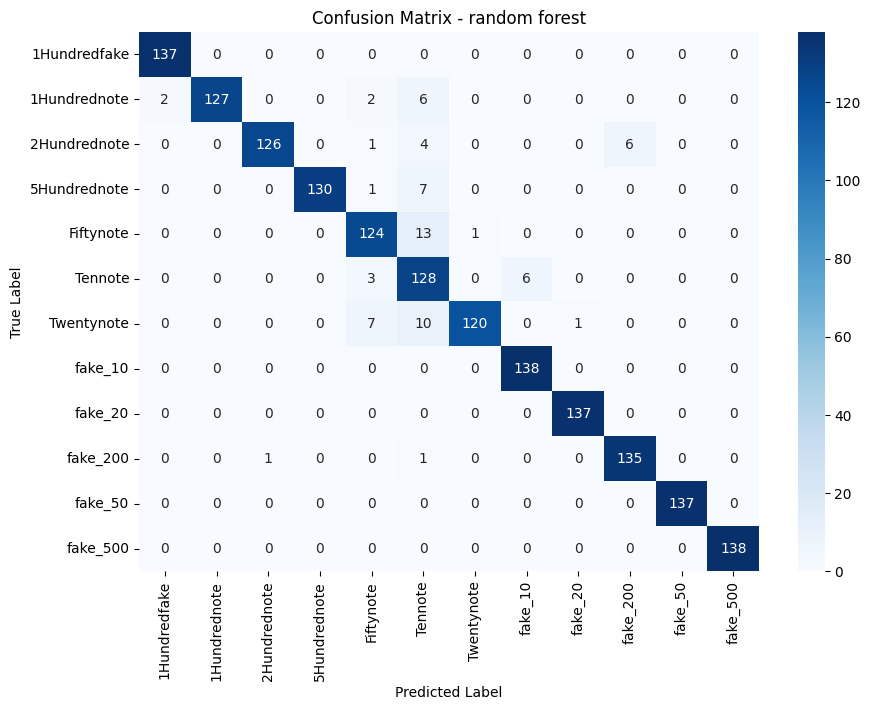

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# ✅ Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Define Class Labels (Ensure this matches your dataset)
category_names = list(class_indices.keys())  # Use actual category names

# ✅ Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=category_names, yticklabels=category_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - random forest")
plt.show()



In [ ]:
correct=2641
Wrong=81

In [ ]:
Acc= correct/(correct+Wrong)
Acc*100

97.02424687729611